## Implementing Logistic regression algorithm to classify spam/non-spam emails

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('data/X.csv',header=None)
y = pd.read_csv('data/y.csv',header=None)

In [3]:
y.columns = ['y']
y['y'] = y['y'].map({0 : -1, 1 : 1})

In [4]:
data = pd.concat([X,y],axis=1)

In [5]:
data.isnull().values.any()

False

In [6]:
s_data = data.sample(frac=1).reset_index(drop=True)

In [7]:
s_data.isnull().values.any()

False

In [8]:
cv_groups = []
s = 0
for i in range(1,11):
    e = s + 460
    inter = s_data.iloc[s:e,:]
    cv_groups.append(inter)
    s = e

Steepest Ascent - Logistic Regression

In [9]:
def get_sigmoid(y,x,w):
    xtw = np.matmul(x,np.transpose(w))
    exp = np.exp(np.multiply(y,xtw))
    sig = exp/(1+exp)
    return sig

In [10]:
import math
parent_obj = []
for i in range(0,10):
    cv_g = cv_groups.copy()
    hold_out = cv_g[i]
    del cv_g[i]
    train = pd.concat(cv_g)
    train.index = range(len(train.index))
    y_train = train.iloc[:,-1]
    train = train.iloc[:,:-1]
    train['intercept'] = 1
    ypred = []
    w = np.matrix(np.full(len(train.columns),0))
    train = np.matrix(train)
    y_train = np.transpose(np.matrix(y_train))
    obj = []
    for t in range(0,1000):
        sig = get_sigmoid(y_train,train,w)
        yx = np.multiply(y_train,train)
        s = np.sum(np.multiply((1-sig),yx),axis=0)
        term = np.multiply((0.01/4600),s)
        w = np.add(w, term)
        
        obj.append(np.sum(np.log(get_sigmoid(y_train,train,w))))
    parent_obj.append(obj)
        
    


Text(0, 0.5, 'Objective function')

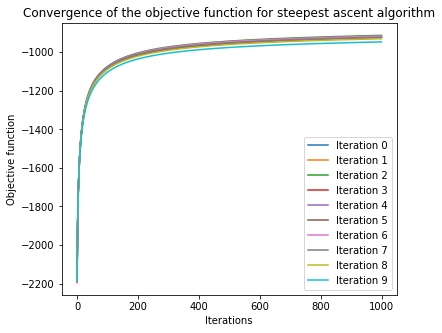

In [11]:
plt.figure(figsize=(6,5))
iteration = 0
for i in parent_obj:
    plt.plot(i,label='Iteration {}'.format(iteration))
    iteration += 1

plt.title("Convergence of the objective function for steepest ascent algorithm")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Objective function")


In [12]:
import math
parent_obj = []
c_matrix = np.array([[0,0],[0,0]])
for i in range(0,10):
    cv_g = cv_groups.copy()
    hold_out = cv_g[i]
    y_test = hold_out.iloc[:,-1]
    hold_out = hold_out.iloc[:,:-1]
    hold_out['intercept']=1
    del cv_g[i]
    train = pd.concat(cv_g)
    train.index = range(len(train.index))
    y_train = train.iloc[:,-1]
    train = train.iloc[:,:-1]
    train['intercept'] = 1
    ypred = []
    w = np.matrix(np.full(len(train.columns),0))
    train = np.matrix(train)
    y_train = np.transpose(np.matrix(y_train))
    obj = []
    for t in range(0,100):
        sig = get_sigmoid(y_train,train,w)
        sig1 = np.multiply(sig,1-sig)
        zero = np.zeros((4140,4140))
        np.fill_diagonal(zero,sig1)
        xtexp = np.matmul(np.transpose(train),zero)
        den = np.matmul(xtexp,train)
        np.fill_diagonal(den,np.add(np.diagonal(den),10**-2))
        yx = np.multiply(y_train,train)
        num = np.sum(np.multiply((1-sig),yx),axis=0)
        den = np.linalg.inv(den)
        numden = np.matmul(num,den)
        w = np.add(w,numden)
        obj.append(np.sum(np.log(get_sigmoid(y_train,train,w))))
        
    parent_obj.append(obj)
    for tind, trow in hold_out.iterrows():
        if (np.matmul(w,np.transpose(trow))) > 0:
            ypred.append(1)   
        else:
            ypred.append(-1)

    # find model accuracy
    tp = 0
    tn = 0
    fp = 0
    fn = 0
        
    for u,v in zip(list(y_test),ypred):

        if (int(u)==v==-1):
            tn += 1
        if (int(u)==v==1):
            tp += 1
        if ((int(u) == -1) & (v == 1)):
            fp += 1
        if ((int(u) == 1) & (v == -1)):
            fn += 1
    c_matrix_inter = np.array([[tp, fp],[fn, tn]])
    c_matrix = np.add(c_matrix, c_matrix_inter)
    
    
        

Text(0, 0.5, 'Objective function')

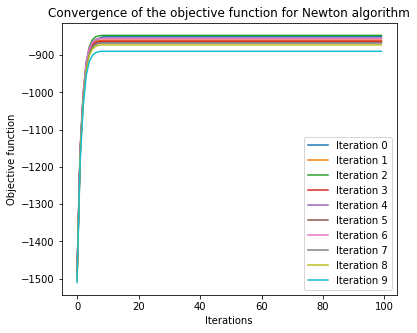

In [13]:
plt.figure(figsize=(6,5))
iteration = 0
for i in parent_obj:
    plt.plot(i,label='Iteration {}'.format(iteration))
    iteration += 1

plt.title("Convergence of the objective function for Newton algorithm")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Objective function")

In [14]:
print("Confusion matrix")
print(c_matrix)

Confusion matrix
[[1603  140]
 [ 210 2647]]


In [15]:
accuracy = (c_matrix[0][0] + c_matrix[1][1])/4600
print("Accuracy: " + str(accuracy*100))

Accuracy: 92.3913043478261
